<img style="float: left; padding-right: 5px; width: 300px" 
src="https://github.com/dianagold/Ec1152_diana/blob/master/econlogo.png?raw=true"> <br/><br/><br/>
# Ec 1152 Using big data to solve economic and social problems
### Section 1: Bowling alleys and mobility

**Harvard University** - Spring 2019 <br/>
**Instructor**: Prof. Raj Chetty <br/>
**Head TF**: Greg Bruich <br/>
**TF**: Diana Goldemberg

In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline

## First Look At The Data

In [2]:
# Assuming that you downloaded the dataset to the same dir from where you are running the notebook 
bowling_data_file = './data/section1_bowling.csv'
bowling_df = pd.read_csv(bowling_data_file, low_memory=False)
bowling_df.head()

,cz,czname,state_id,pop2000,s_rank,e_rank_b,prob_p1_k5,bowl90,mergebowlingalleys,bowl_per_capita
0,100,Johnson City,Tennessee,576081,0.37170,38.387501,0.062199,10,matched (3),0.173587
1,200,Morristown,Tennessee,227816,0.35611,37.776752,0.053652,3,matched (3),0.131685
2,301,Middlesborough,Tennessee,66708,0.37557,39.049252,0.072635,2,matched (3),0.299814
3,302,Knoxville,Tennessee,727600,0.37253,37.841248,0.056281,9,matched (3),0.123694
4,401,Winston-Salem,North Carolina,493180,0.38913,36.969250,0.044801,5,matched (3),0.101383


## Linear regression
Linear regression (y=a+bx) of mobility (y) on bowling alleys (x)

Beta_hat: 
 [12.04452587]


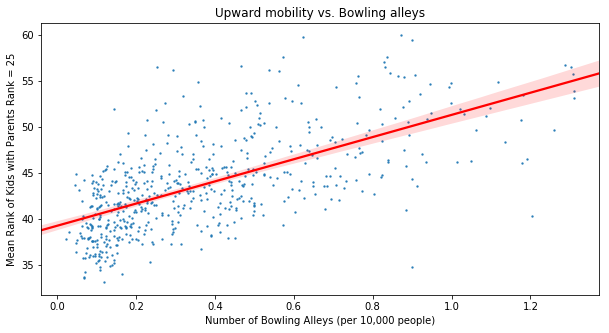

In [3]:
# Raw Data
x = bowling_df['bowl_per_capita']
y = bowling_df['e_rank_b']

# Display the beta in y=a+bx
reg_line = LinearRegression()
reg_line.fit(x.values.reshape((len(x), 1)), y.values)
print('Beta_hat: \n', reg_line.coef_)

# Plot regression with slope confidence interval
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(x=x, y=y, scatter_kws={'s':2}, line_kws={"color":"r"}, ci=95)

# Labels
ax.set_xlabel('Number of Bowling Alleys (per 10,000 people)')
ax.set_ylabel('Mean Rank of Kids with Parents Rank = 25')
ax.set_title('Upward mobility vs. Bowling alleys')

# Save graph
plt.savefig('./graphs/py_regression.png', dpi=300)

## Standardize variables
Transforming into a variable with mean=0 and stdev=1

In [4]:
# Copy dataframe and list columns to standardize
standardized_df = bowling_df.copy()
col_names = ['bowl_per_capita', 'e_rank_b']
features = standardized_df[col_names]

# Create the Scaler object and fit data
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
standardized_df[col_names] = features

# Standardized set
standardized_df.head()

,cz,czname,state_id,pop2000,s_rank,e_rank_b,prob_p1_k5,bowl90,mergebowlingalleys,bowl_per_capita
0,100,Johnson City,Tennessee,576081,0.37170,-1.039608,0.062199,10,matched (3),-0.719604
1,200,Morristown,Tennessee,227816,0.35611,-1.157743,0.053652,3,matched (3),-0.871613
2,301,Middlesborough,Tennessee,66708,0.37557,-0.911607,0.072635,2,matched (3),-0.261677
3,302,Knoxville,Tennessee,727600,0.37253,-1.145268,0.056281,9,matched (3),-0.900603
4,401,Winston-Salem,North Carolina,493180,0.38913,-1.313936,0.044801,5,matched (3),-0.981544


## Linear regression from standardized variables
Linear regression (y=a+bx) of std_mobility (y) on std_bowling_alleys (x)

Beta_hat: 
 [0.64219257]


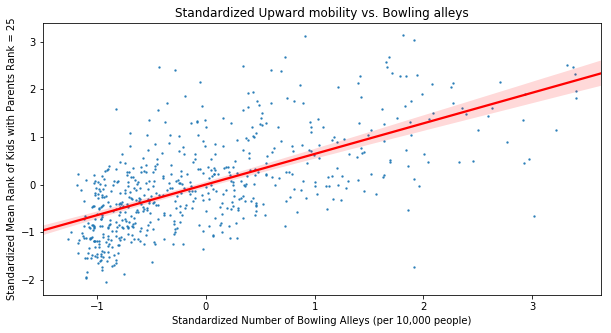

In [5]:
# Basically, the same code as before, but changing the input data and labels

# Raw Data
x = standardized_df['bowl_per_capita']
y = standardized_df['e_rank_b']

# Display the beta in y=a+bx
reg_line = LinearRegression()
reg_line.fit(x.values.reshape((len(x), 1)), y.values)
print('Beta_hat: \n', reg_line.coef_)

# Plot regression with slope confidence interval
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(x=x, y=y, scatter_kws={'s':2}, line_kws={"color":"r"}, ci=95)

# Labels
ax.set_xlabel('Standardized Number of Bowling Alleys (per 10,000 people)')
ax.set_ylabel('Standardized Mean Rank of Kids with Parents Rank = 25')
ax.set_title('Standardized Upward mobility vs. Bowling alleys')

# Save graph
plt.savefig('./graphs/py_std_regression.png', dpi=300)